After importing the dataset using Pandas, start by showing the head of the dataset then some general information about the data columns and values.

In [85]:
import pandas as pd
data = pd.read_csv("titanic-passengers.csv",sep = ";")
print(data.head())
print(data.info())
print(data.describe())

   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):


As a next step apply what you have learned in Data preprocessing to preprocess your data: find missing informations and replace them by the appropriate values.

In [86]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [87]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [88]:
data['Embarked'].fillna(data['Embarked'].mode(), inplace=True)

In [89]:
mode = list(data["Embarked"].mode())[0]

In [90]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [91]:
for  i, row in data.iterrows():
    if pd.isnull(row["Embarked"]) == True:
        data.iloc[i,-1] = mode

In [92]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [93]:
data.dropna(axis=1, how='any', inplace=True)

Transform categorical data using method of your choice(labelEncoder/one hot encoding)

In [94]:
from sklearn.preprocessing import LabelEncoder
encorder = LabelEncoder()
data['Survived']=encorder.fit_transform(data['Survived'])
data['Embarked']=encorder.fit_transform(data['Embarked'])
data['Sex']=encorder.fit_transform(data['Sex'])
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,28.0,0,0,349215,7.8958,2


In [95]:
x = "Collander, Mr. Erik Gustaf"
x.split(".")[0].split(",")[1][1:]

'Mr'

In [96]:
data["title2"] = data["Name"].apply(lambda x:x.split(".")[0].split(",")[1][1:])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title2
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,0,Mr
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,2,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,28.0,0,0,349215,7.8958,2,Mr


In [97]:
data['title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
data['title_encoded']=encorder.fit_transform(data['title'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title2,title,title_encoded
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,Mr,Mr,12
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,Mr,Mr,12
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,Mr,Mr,12
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,Mrs,Mrs,13
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,Mr,Mr,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,Mrs,Mrs,13
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,0,Mr,Mr,12
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,2,Miss,Miss,9
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,28.0,0,0,349215,7.8958,2,Mr,Mr,12


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.datasets import load_iris

In [99]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
col_to_exclude = "Survived"
x= data.drop(col_to_exclude, axis=1).values[:,np.newaxis]
y=data["Survived"].values
data['Name'] = data['Name'].astype(str)
label_encoder = LabelEncoder()
data['Name'] = label_encoder.fit_transform(data['Name'])
data['Ticket'] = data['Ticket'].astype(str)
label_encoder = LabelEncoder()
data['Ticket'] = label_encoder.fit_transform(data['Ticket'])
data['Fare'] = data['Fare'].astype(str)
label_encoder = LabelEncoder()
data['Fare'] = label_encoder.fit_transform(data['Fare'])
data['title2'] = data['title2'].astype(str)
data['title2'] = data['title2'].fillna('Unknown')
label_encoder = LabelEncoder()
data['title2'] = label_encoder.fit_transform(data['title2'])
data['title'] = data['title'].astype(str)
data['title'] = data['title'].fillna('Unknown')
label_encoder = LabelEncoder()
data['title'] = label_encoder.fit_transform(data['title'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [100]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title2,title,title_encoded
0,343,0,2,170,1,28.0,0,0,159,21,2,11,12,12
1,76,0,3,546,1,25.0,0,0,347,180,2,11,12,12
2,641,0,3,397,1,20.0,0,0,409,192,2,11,12,12
3,568,0,3,627,0,29.0,0,4,395,67,2,12,13,13
4,672,0,1,202,1,31.0,1,0,569,140,2,11,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,576,0,14.0,1,0,132,104,0,12,13,13
887,61,0,3,749,1,22.0,0,0,197,173,0,11,12,12
888,535,0,3,123,0,30.0,0,0,260,222,2,8,9,9
889,102,0,3,658,1,28.0,0,0,361,196,2,11,12,12


In [101]:
print(data.dtypes)

PassengerId        int64
Survived           int32
Pclass             int64
Name               int32
Sex                int32
Age              float64
SibSp              int64
Parch              int64
Ticket             int32
Fare               int32
Embarked           int32
title2             int32
title              int32
title_encoded      int32
dtype: object


In [102]:
X = data[['Age', 'Fare', 'Pclass']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[104  10]
 [ 35  30]]


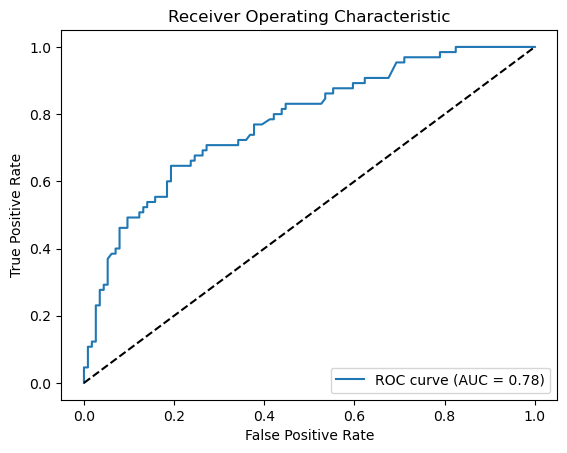

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [105]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data[['Age', 'Fare', 'Pclass']]  
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

Optimal number of neighbors: 15


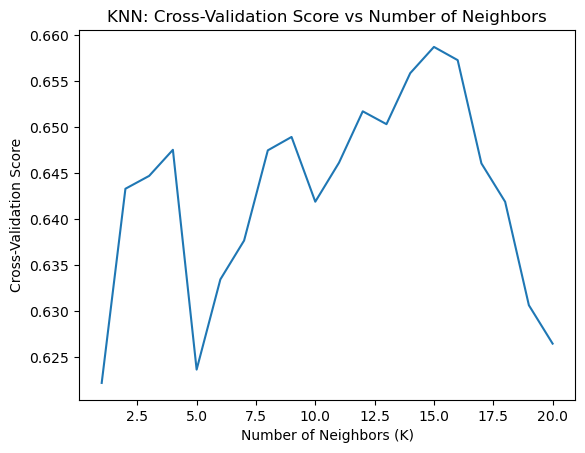

In [106]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

neighbors = list(range(1, 21))

cv_scores = []

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("Optimal number of neighbors:", optimal_k)

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Score')
plt.title('KNN: Cross-Validation Score vs Number of Neighbors')
plt.show()


In [107]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

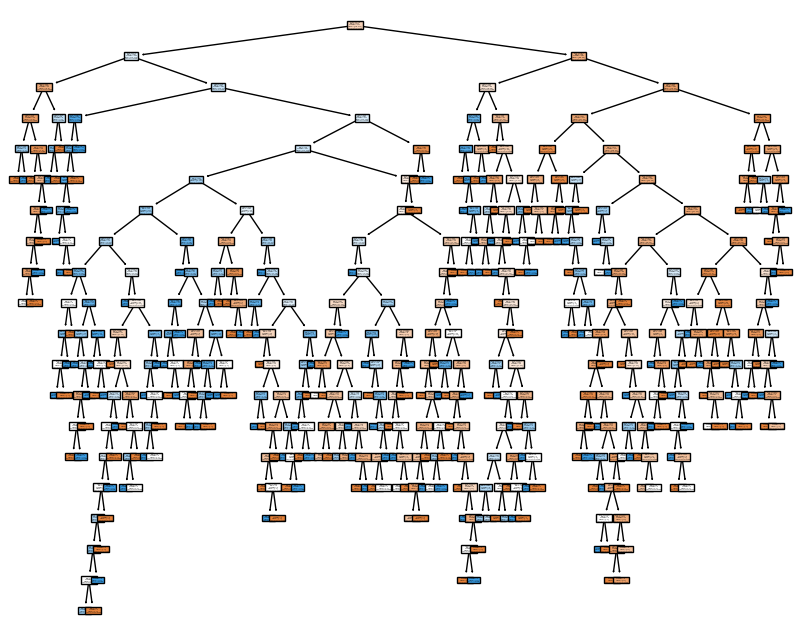

In [108]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [109]:
dt_model_modified = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
dt_model_modified.fit(X_train, y_train)
dt_y_pred_modified = dt_model_modified.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score
dt_accuracy_modified = accuracy_score(y_test, dt_y_pred_modified)
print("Modified Decision Tree Accuracy:", dt_accuracy_modified)

Modified Decision Tree Accuracy: 0.7206703910614525


In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)  
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [112]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.6536312849162011


In [113]:
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_accuracy_modified = accuracy_score(y_test, dt_y_pred_modified)
print("Modified Decision Tree Accuracy:", dt_accuracy_modified)
print("Previous Decision Tree Accuracy:", dt_accuracy)

Modified Decision Tree Accuracy: 0.7206703910614525
Previous Decision Tree Accuracy: 0.6536312849162011


C:\Users\ab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

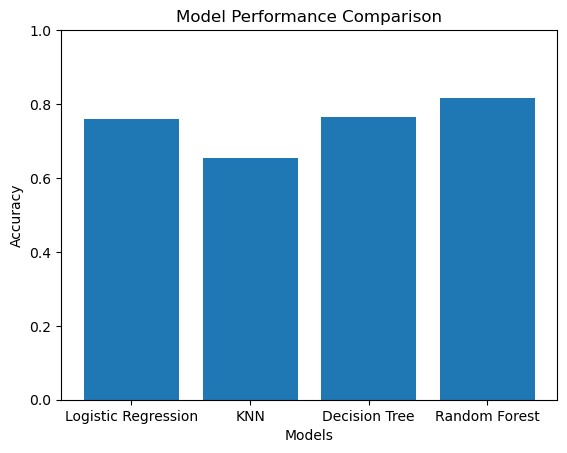

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = data.drop('Survived', axis=1)
y = data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)


knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)


models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [lr_accuracy, knn_accuracy, dt_accuracy, rf_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.show()